Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
dados = pd.read_csv('./mall.csv')

In [3]:
dados.shape

(200, 5)

In [4]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Limpeza de Dados


In [5]:
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Análise Exploratória

In [6]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
dados['Annual Income (k$)'].median()

np.float64(61.5)

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

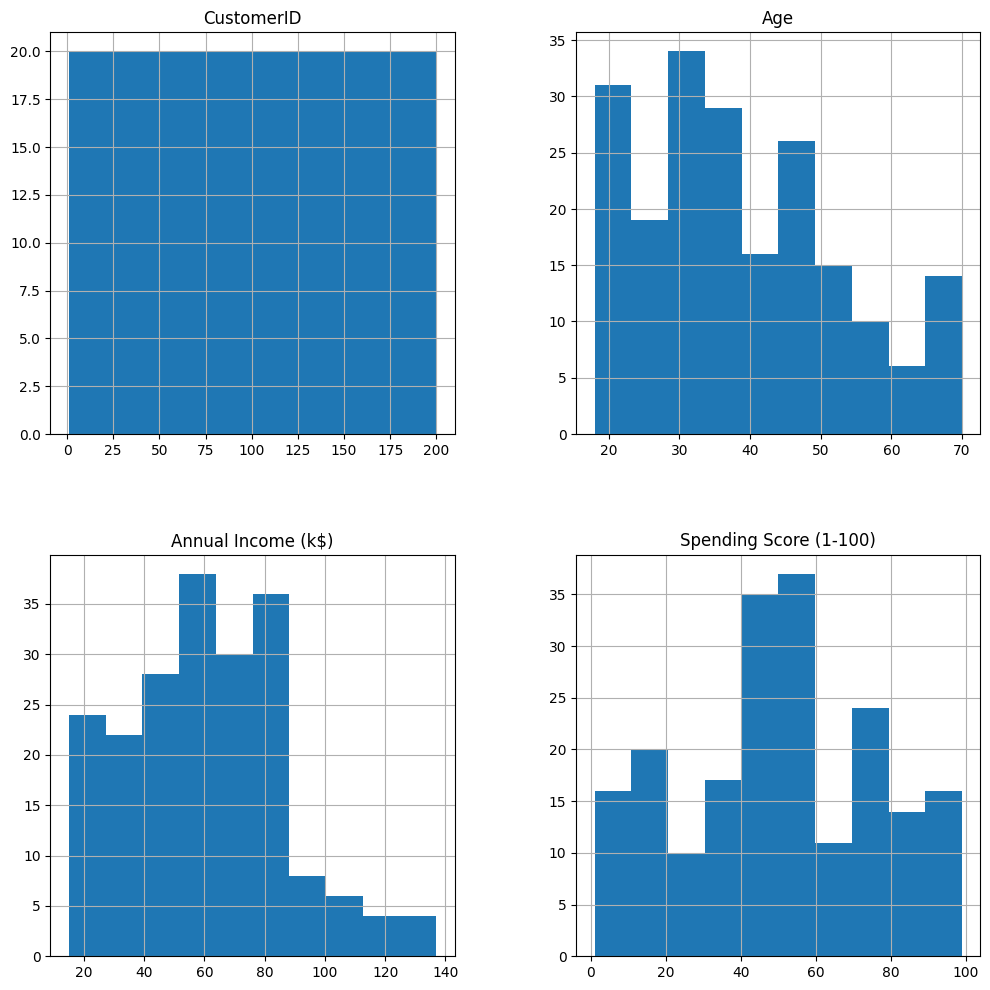

In [8]:
dados.hist(figsize=(12,12))

<Axes: >

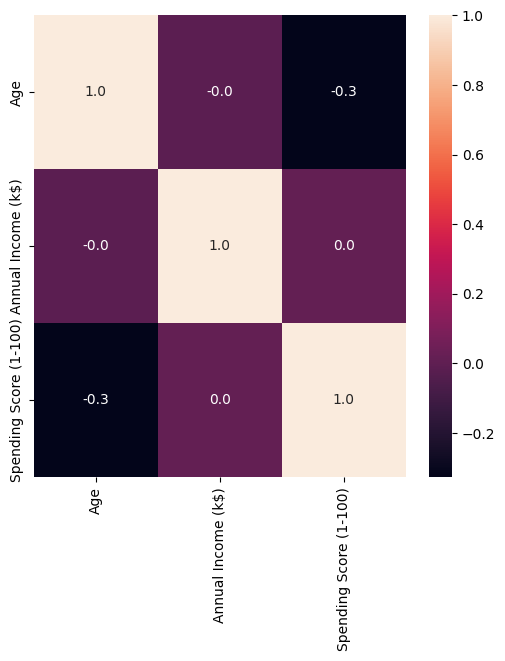

In [9]:
plt.figure(figsize=(6,6))

correlacao = dados.drop(columns=['CustomerID','Gender']).corr(method='pearson')

sns.heatmap(correlacao, annot=True, fmt='.1f')


In [10]:
dados.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

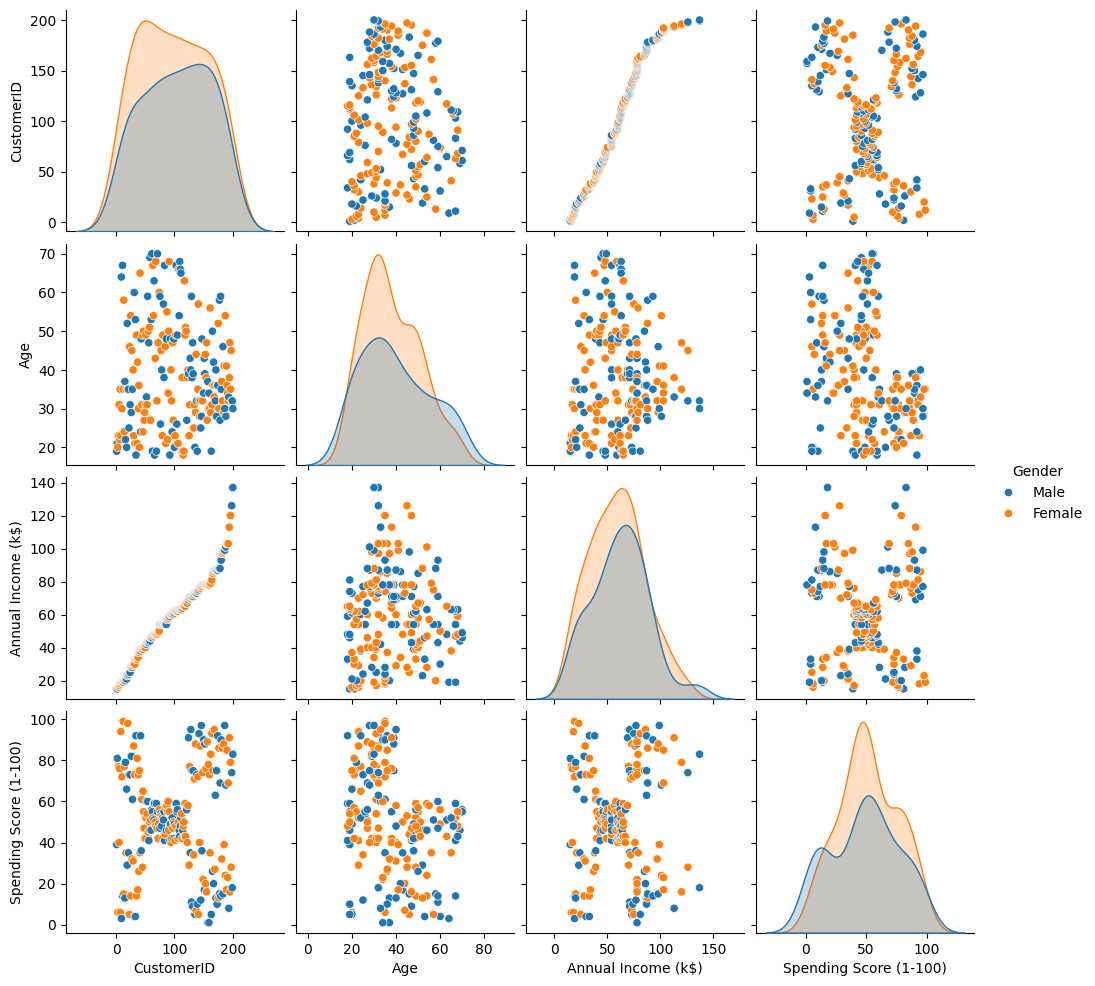

In [11]:
sns.pairplot(dados, hue='Gender')
plt.show()

Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
scaler = StandardScaler()
scaler.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [14]:
dados_escalonados = scaler.transform(dados[['Annual Income (k$)','Spending Score (1-100)']])

In [15]:
dados_escalonados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [16]:
k_means = KMeans(n_clusters=6, random_state=0)

k_means.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

centroides = k_means.cluster_centers_

kmeans_labels = k_means.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

In [17]:
k_means_escalonados = KMeans(n_clusters=6, random_state=0)

k_means_escalonados.fit(dados_escalonados)

centroides_escalonados = k_means_escalonados.cluster_centers_

kmeans_labels_escalonados = k_means_escalonados.predict(dados_escalonados)

In [36]:
centroides_escalonados

array([[ 0.08300682, -0.1273981 ],
       [ 0.99158305,  1.23950275],
       [ 1.1010449 , -1.34346864],
       [-1.35185213, -1.19089759],
       [-0.57434225,  0.05096574],
       [-1.35921337,  1.19570407]])

In [18]:
dados_Escalonados = pd.DataFrame(dados_escalonados, columns=['Annual Income (k$)','Spending Score (1-100)'])

In [19]:
dados_Escalonados.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [20]:
dados_Escalonados['Grupos'] = kmeans_labels_escalonados
dados['Grupos'] = kmeans_labels


print(dados_Escalonados.head())
print(dados.head())



   Annual Income (k$)  Spending Score (1-100)  Grupos
0           -1.738999               -0.434801       3
1           -1.738999                1.195704       5
2           -1.700830               -1.715913       3
3           -1.700830                1.040418       5
4           -1.662660               -0.395980       3
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  Grupos
0           1    Male   19                  15                      39       3
1           2    Male   21                  15                      81       5
2           3  Female   20                  16                       6       3
3           4  Female   23                  16                      77       5
4           5  Female   31                  17                      40       3


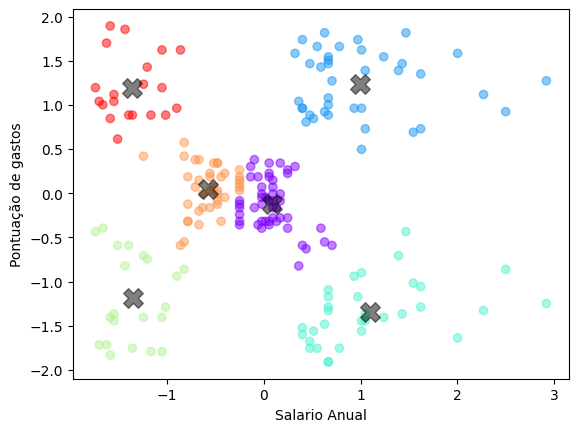

In [21]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados_Escalonados[['Annual Income (k$)']],dados_Escalonados[['Spending Score (1-100)']], c=kmeans_labels_escalonados, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

# plotando os centroides
plt.scatter(centroides_escalonados[:, 0], centroides_escalonados[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

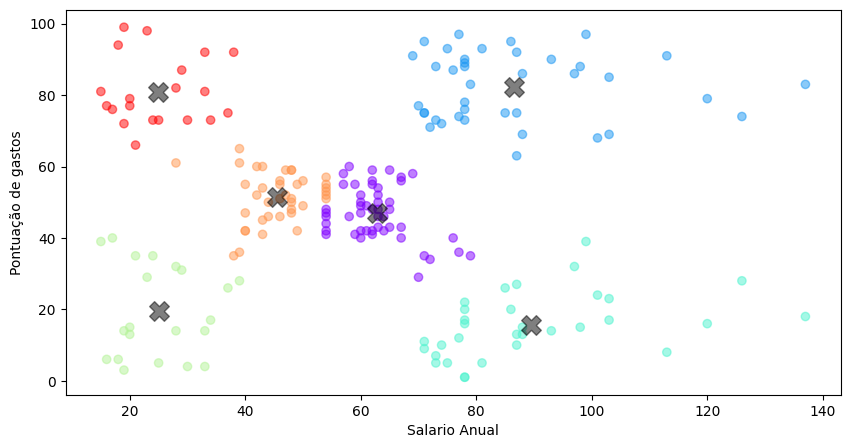

In [22]:

plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

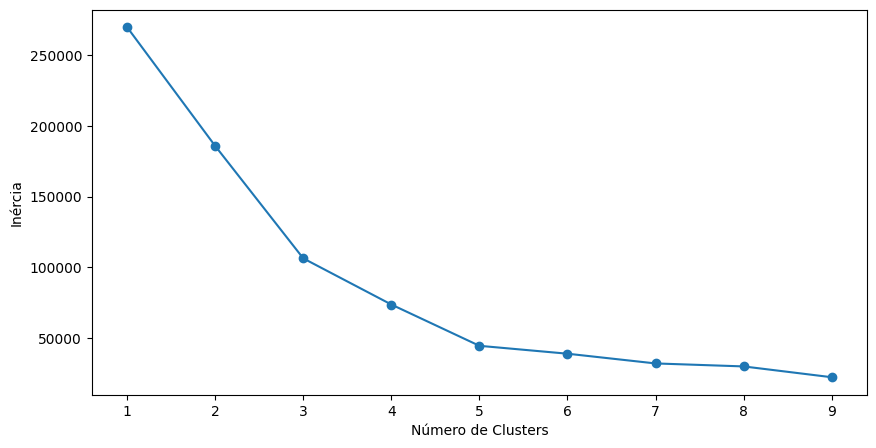

In [23]:
k = list(range(1,10))
sse = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmeans.inertia_) # calculo do erro

plt.rcParams['figure.figsize'] = (10,5)
plt.plot(k,sse,'-o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [24]:
dados.groupby('Grupos')['Age'].mean()

Grupos
0    41.836735
1    32.692308
2    41.000000
3    44.142857
4    43.820513
5    24.850000
Name: Age, dtype: float64

In [25]:
dados.groupby('Grupos')['Annual Income (k$)'].mean()

Grupos
0    62.734694
1    86.538462
2    89.406250
3    25.142857
4    45.512821
5    24.950000
Name: Annual Income (k$), dtype: float64

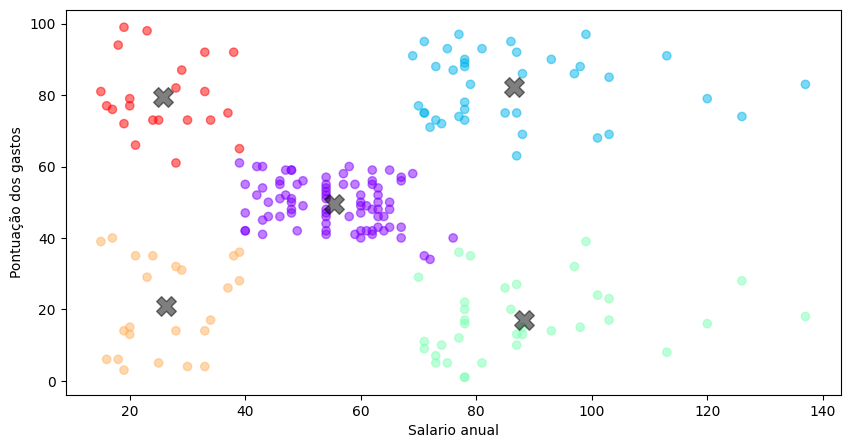

In [26]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

centroides = kmeans.cluster_centers_

kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c= kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario anual')
plt.ylabel('Pontuação dos gastos')
plt.scatter(centroides[:,0],centroides[:,1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

In [27]:
grupo_1 = dados[dados['Grupos']==1]
grupo_2 = dados[dados['Grupos']==2]
grupo_3 = dados[dados['Grupos']==3]

DBSCAN


In [28]:
dbscan = DBSCAN(eps=10,min_samples=8)
dbscan.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

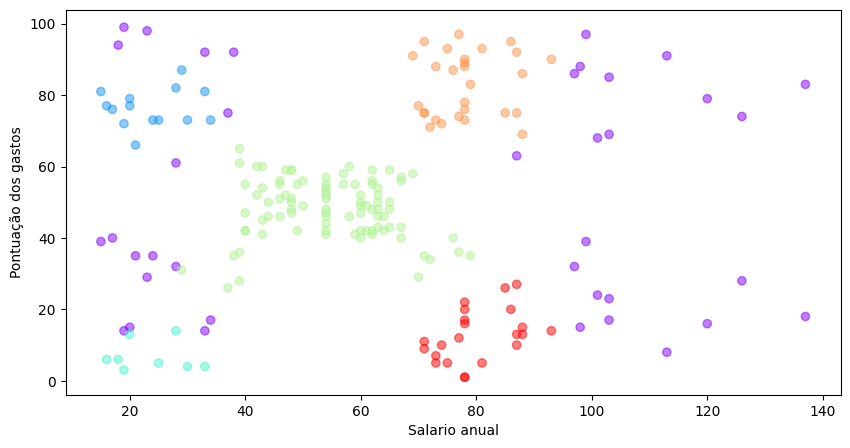

In [29]:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario anual')
plt.ylabel('Pontuação dos gastos')
plt.show()

In [30]:
mascara = dbscan_labels>=0
mascara

array([False,  True,  True,  True, False,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

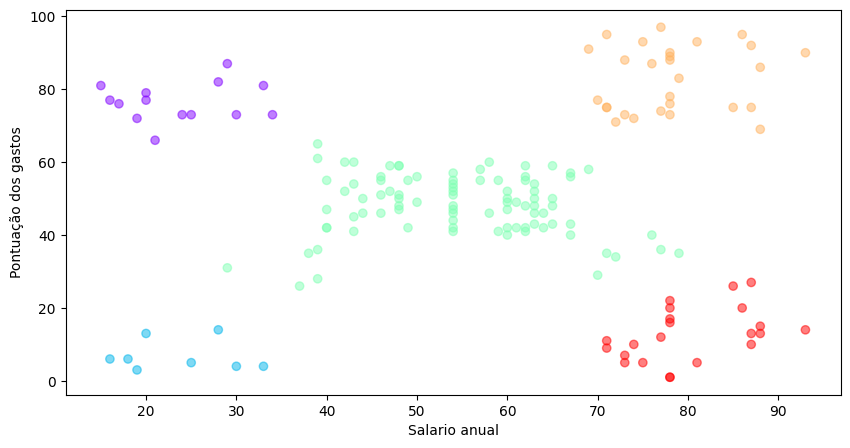

In [31]:
plt.scatter(dados[['Annual Income (k$)']][mascara],dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Salario anual')
plt.ylabel('Pontuação dos gastos')
plt.show()

In [32]:
list(mascara).count(False)

38

In [33]:
adjusted_rand_score(kmeans_labels,dbscan_labels)

0.7151933782093212

In [34]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],kmeans_labels)

0.553931997444648

In [35]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],dbscan_labels)

0.36328873885121793